Import necessary libaries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Create a load csv func to read csv file

In [2]:
def load_csv(filepath):
    sample = pd.read_csv(filepath, nrows =20)
    dt= {}
    for col, names in zip(sample.columns, sample.dtypes):
        dt[col] = names
        
    full_df = pd.read_csv(filepath, dtype=dt)
    
    return full_df

In [3]:
df = load_csv('./data/BFtrain.csv')

In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


Check for null data

In [5]:
print(df.isnull().sum())
print('df shape:', df.shape)

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64
df shape: (550068, 12)


Luckily, there are not missing values on Purchase column

In [6]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

Since null are in categorical columns, replace it with a unique valuable, here i'll use "0"

In [7]:
df.fillna(0, inplace =True)
df.isnull().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2            False
Product_Category_3            False
Purchase                      False
dtype: bool

label encoder gender, age column

In [8]:
def age_enc(col):
    """
    Produce a age dictionary from data then encoding it
    Return column that got encoded and age dictionary for later use
    """
    to_num={}
    for num, name in enumerate(pd.unique(col)):
        to_num[name] = num
    
    return col.map(lambda x: to_num.get(x, col)), to_num

In [9]:
df.Age,age_group = age_enc(df['Age'])

First, we will check where most purchased being done

Text(0.5, 1.0, 'Customers city categoricals ')

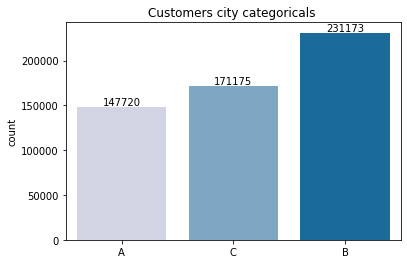

In [10]:
ax = sns.countplot(x = df.City_Category.values, palette='PuBu')
ax.bar_label(ax.containers[0])
plt.title('Customers city categoricals ')

So most of customers came from city category B,  
what about the average and total purchased of each city category ?

In [11]:
def plot_average_total_purchase(data, show_num = False):
    """
    Input by dataframe that got 2 columns then plot
    base on average and sum in bar plot
    """
    average_purchase = data.groupby(data.columns[0]).mean()
    total_purchase = data.groupby(data.columns[0]).sum()
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize =(10, 5))
    if show_num:

        sns.barplot(ax = ax[0], x = average_purchase.index, y= average_purchase.values.squeeze(), palette='PuBu')
        ax[0].bar_label(ax[0].containers[0])
        ax[0].set_title(f'Average Purchase by {data.columns[0]}')
        sns.barplot(ax = ax[1], x = total_purchase.index, y = total_purchase.values.squeeze()/1000000, palette='PuBu')
        ax[1].bar_label(ax[1].containers[0])
        ax[1].set_title(f'Total Purchase by {data.columns[0]} per million')

    else:
        sns.barplot(ax = ax[0], x = average_purchase.index, y= average_purchase.values.squeeze(), palette='PuBu')
        # ax[0].bar_label(ax[0].containers[0])
        ax[0].set_title(f'Average Purchase by {data.columns[0]}')
        sns.barplot(ax = ax[1], x = total_purchase.index, y = total_purchase.values.squeeze()/1000000, palette='PuBu')
        # ax[1].bar_label(ax[1].containers[0])
        ax[1].set_title(f'Total Purchase by {data.columns[0]} per million')
    

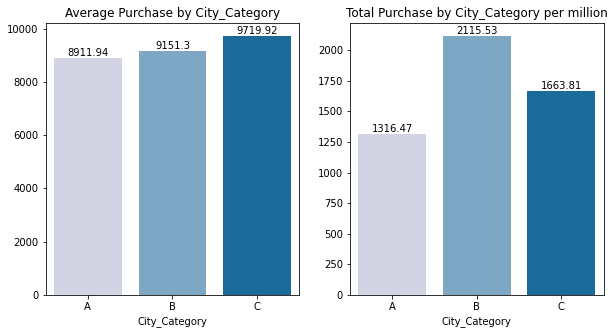

In [22]:
city_purchase = df.loc[:,('City_Category', 'Purchase')]
plot_average_total_purchase(city_purchase, show_num=True)

In average, people in city C made more purchase, but in total, people in city B made more purchase  
So, what did they buy most in Black Friday ?

<AxesSubplot:xlabel='City_Category'>

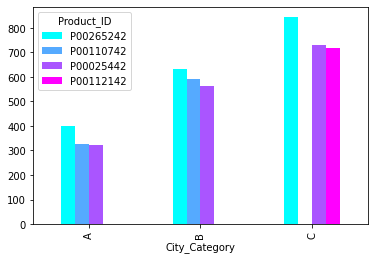

In [13]:
top_product = df.loc[:, ('Product_ID', 'City_Category')].groupby('City_Category').value_counts()\
                                                        .groupby(level=[0]).head(3)
top_product.unstack(level=1).plot(kind='bar', cmap='cool')

Product with ID 254242 is the bestseller in every city,  
Coming up with product ID 25442,  
So, what about purchase for Male and Female ?

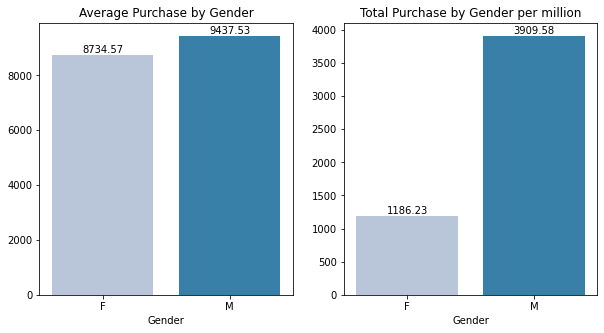

In [23]:
gender_purchase = df.loc[:, ('Gender', 'Purchase')]
plot_average_total_purchase(gender_purchase, show_num=True)

In both average and total, male made more purchase in Black Friday  
What are male bestseller product ID ?

<AxesSubplot:xlabel='Gender'>

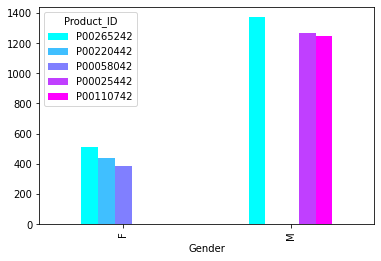

In [27]:
top_male_product = df.loc[:, ('Gender', 'Product_ID')].groupby('Gender').value_counts()\
                                                        .groupby(level=[0]).head(3)
top_male_product.unstack(level=1).plot(kind='bar', cmap='cool')

Beside ID265242, bestseller for male is 025442 and 110742  
And for female, these are ID 220442 and 58042

So good so far, what about the marital status, does it affect the purchase in these city ?

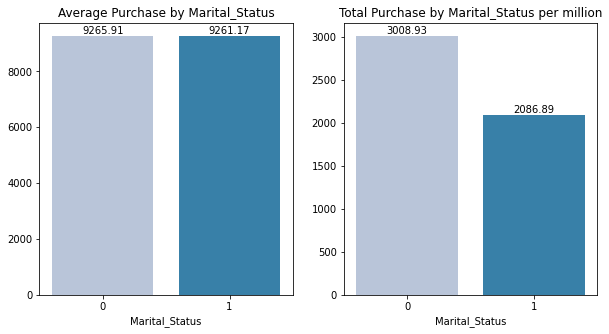

In [24]:
marital_purchase = df.loc[:, ('Marital_Status', 'Purchase')]
plot_average_total_purchase(marital_purchase, show_num=True)

In average, they made equally purchase, but in total, single individual tend to made more purchase  
is it because there are more single individual than people in marriage ?

In [17]:
df['Marital_Status'].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

Seem to be like it  
What about people's age and purchase values ?

{'0-17': 0, '55+': 1, '26-35': 2, '46-50': 3, '51-55': 4, '36-45': 5, '18-25': 6}


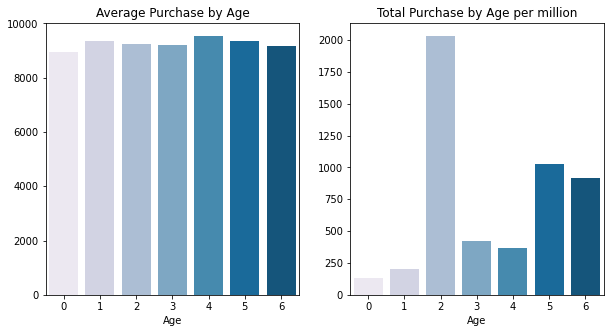

In [18]:
age_purchase = df.loc[:,('Age', 'Purchase')]
plot_average_total_purchase(age_purchase)
print(age_group)

In average, most purchase was made by age group 4 which is 51-55 years old  
And in total, most purchase was made by group 2, which is 26-35 years old

In [19]:
df['Age'].value_counts()

2    219587
5    110013
6     99660
3     45701
4     38501
1     21504
0     15102
Name: Age, dtype: int64

And group 2, 5 is the most age populate category in the city  
Still, that's quite an overwhelming value came from group 2  
I am curious about their bestseller

In [20]:
group2_product = df[df.Age.isin([2])]
group2_product.loc[:, ('Age', 'Product_ID')].value_counts().head(5)

Age  Product_ID
2    P00265242     746
     P00110742     634
     P00025442     608
     P00112142     606
     P00057642     597
dtype: int64

Great, there are still Occupation, Time Stay in the City and some product categorical left.

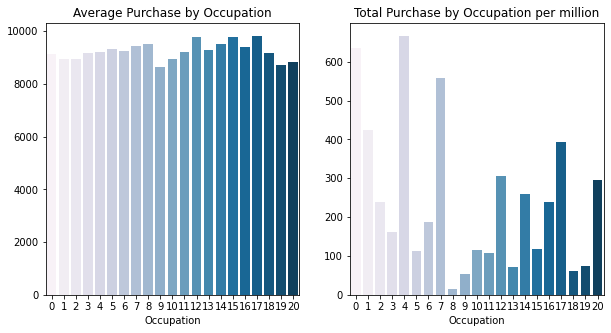

In [21]:
occupation_purchase = df.loc[:, ('Occupation', 'Purchase')]
plot_average_total_purchase(occupation_purchase)

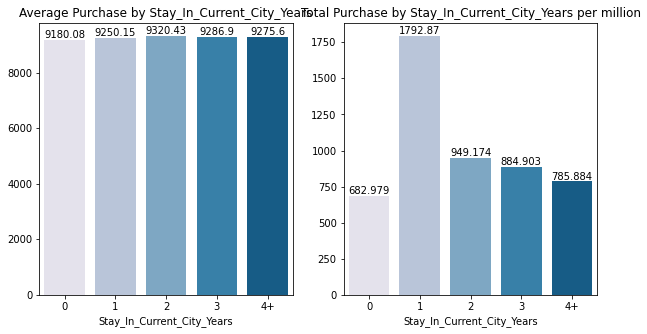

In [26]:
stay_purchase = df.loc[:, ('Stay_In_Current_City_Years', 'Purchase')]
plot_average_total_purchase(stay_purchase, show_num=True)

We finishs our EDA with a more general plot

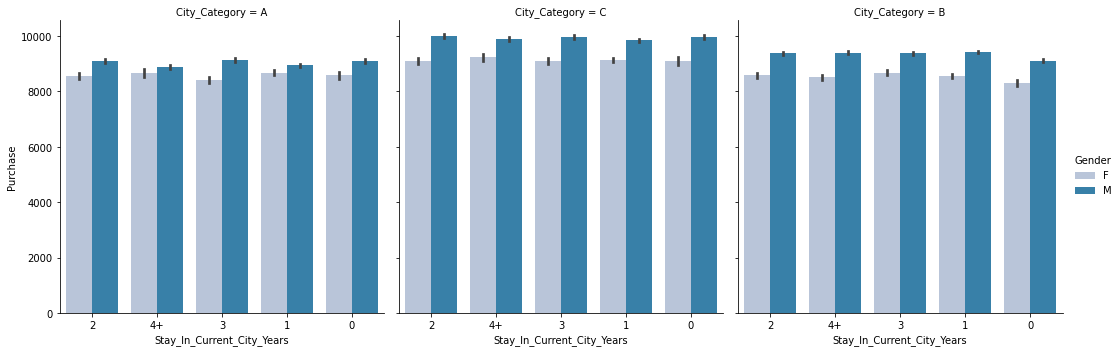

In [36]:
sns.catplot(data =df, x = 'Stay_In_Current_City_Years', y= 'Purchase',
                    hue='Gender', col='City_Category', kind='bar', palette='PuBu')

Thank you for reading  
See you on the next EDA